In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'

link = 'https://rally-base.com/2023/eko-acropolis-rally-2023/?ssId='
startat, no_ss=7824, int(15) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [2]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,69,Rovanperä,RC1,00:01:32.9,57.35 0.00,00:00:00.0 00:00:00.0,1,Acropolis,1
2,2,4,Lappi Esa,RC1,00:01:33.2,57.17 0.20,00:00:00.3 00:00:00.3,1,Acropolis,2
3,3,11,Neuville,RC1,00:01:33.3,57.11 0.27,00:00:00.4 00:00:00.1,1,Acropolis,3
4,4,6,Sordo Dan,RC1,00:01:33.4,57.04 0.34,00:00:00.5 00:00:00.1,1,Acropolis,4
5,5,8,Tänak Ott,RC1,00:01:33.6,56.92 0.47,00:00:00.7 00:00:00.2,1,Acropolis,5
...,...,...,...,...,...,...,...,...,...,...
58,56,78,Papageorgi,RC4,00:24:20.7,44.41 46.24,00:13:53.3 00:00:00.0,12,Acropolis,58
59,56,81,Panteli C,RC4,00:24:20.7,44.41 46.24,00:13:53.3 00:00:00.0,12,Acropolis,59
60,56,82,Kanellopou,RC4,00:24:20.7,44.41 46.24,00:13:53.3 00:00:00.0,12,Acropolis,60
61,56,85,Kaltsounis,RC4,00:24:20.7,44.41 46.24,00:13:53.3 00:00:00.0,12,Acropolis,61


In [4]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [5]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [6]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [7]:
rally2023_ClassView

0                              Pos.                                          \
ss                               1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                     
4   Lappi  Esa RC1   Acropolis    2   7   6   3   4   7   7  29   7   7   6   
6   Sordo  Dan RC1   Acropolis    4   6   8   6   5   8   6   8   4   4   5   
7   Loubet  P. RC1   Acropolis    8  67  65  65   -   -   -   -   -   -   -   
8   Tänak  Ott RC1   Acropolis    5   3   4   3   1   1   5   7   5   5   4   
9   Serderidis RC1   Acropolis   32  26  31   9  28  35  23  25  20  18  22   
...                             ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
81  Panteli  C RC4   Acropolis   65  57  54  10  52  49  46  45  22  38  56   
82  Kanellopou RC4   Acropolis   68  64  64  10  59  64  62  53  60  58  56   
83  Šekuljica  RC5   Acropolis   60  62  63  10  56  58  55  50  22  63  62   
84  Parellis   RC5   Acropolis   62  60  61  10  55  55  52  46  22  42  40   
85  Kaltsounis RC4   Acropolis   67  65  68  66  67  66  59  62  60  58  56   

0                                   
ss                              12  
No. Crew       Group Race           
4   Lappi  Esa RC1   Acropolis  15  
6   Sordo  Dan RC1   Acropolis   2  
7   Loubet  P. RC1   Acropolis   -  
8   Tänak  Ott RC1   Acropolis   3  
9   Serderidis RC1   Acropolis  16  
...                             ..  
81  Panteli  C RC4   Acropolis  56  
82  Kanellopou RC4   Acropolis  56  
83  Šekuljica  RC5   Acropolis  62  
84  Parellis   RC5   Acropolis  41  
85  Kaltsounis RC4   Acropolis  56  

[69 rows x 12 columns]

In [8]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,69,Rovanperä,RC1,1,Acropolis,1,92.9
2,4,Lappi Esa,RC1,1,Acropolis,2,93.2
3,11,Neuville,RC1,1,Acropolis,3,93.3
4,6,Sordo Dan,RC1,1,Acropolis,4,93.4
5,8,Tänak Ott,RC1,1,Acropolis,5,93.6
...,...,...,...,...,...,...,...
58,78,Papageorgi,RC4,12,Acropolis,58,1460.7
59,81,Panteli C,RC4,12,Acropolis,59,1460.7
60,82,Kanellopou,RC4,12,Acropolis,60,1460.7
61,85,Kaltsounis,RC4,12,Acropolis,61,1460.7


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Group             
Acropolis 1  RC1           92.9
             RC2           95.0
             RC3          101.7
             RC4          109.7
             RC5          115.5
          2  RC1          334.4
             RC2          358.4
             RC3          386.7
             RC4          424.9
             RC5          470.4
          3  RC1          676.8
             RC2          719.0
             RC3          769.8
             RC4          856.5
             RC5          959.9
          4  RC1          332.1
             RC2          375.6
             RC3          375.6
             RC4          375.6
             RC5          375.6
          5  RC1          771.7
             RC2          811.8
             RC3          872.7
             RC4          940.5
             RC5         1079.5
          6  RC1         1081.4
             RC2         1141.8
             RC3         1214.5
             RC4         1327.7
             RC5         1476.1
          7  RC1         1186.5
             RC2         1230.8
             RC3         1320.0
             RC4         1409.3
             RC5         1576.7
          8  RC1         1020.5
             RC2         1050.7
             RC3         1132.6
             RC4         1199.9
             RC5         1323.3
          9  RC1          647.6
             RC2          690.5
             RC3          800.7
             RC4          800.7
             RC5          800.7
          10 RC1         1147.5
             RC2         1179.4
             RC3         1275.0
             RC4         1452.3
             RC5         1691.4
          11 RC1         1003.5
             RC2         1045.5
             RC3         1102.2
             RC4         1225.0
             RC5         1443.8
          12 RC1          627.4
             RC2          674.9
             RC3          764.7
             RC4          860.7
             RC5         1150.2

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9
...,...,...,...,...,...,...,...,...,...
780,81,Panteli C,RC4,12,Acropolis,59,1460.7,860.7,627.4
781,82,Kanellopou,RC4,12,Acropolis,60,1460.7,860.7,627.4
782,85,Kaltsounis,RC4,12,Acropolis,61,1460.7,860.7,627.4
783,84,Parellis,RC5,12,Acropolis,41,1150.2,1150.2,627.4


In [11]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,81,Panteli C,RC4,12,Acropolis,59,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
781,82,Kanellopou,RC4,12,Acropolis,60,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
782,85,Kaltsounis,RC4,12,Acropolis,61,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
783,84,Parellis,RC5,12,Acropolis,41,1150.2,1150.2,627.4,522.8,83.328020,12,0.0,0.000000


In [30]:
Group = 'RC4'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,77,Plagos Io,RC4,12,Acropolis,57,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
779,78,Papageorgi,RC4,12,Acropolis,58,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
780,81,Panteli C,RC4,12,Acropolis,59,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
781,82,Kanellopou,RC4,12,Acropolis,60,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701


In [31]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,77,Plagos Io,RC4,12,Acropolis,57,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
779,78,Papageorgi,RC4,12,Acropolis,58,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
780,81,Panteli C,RC4,12,Acropolis,59,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701
781,82,Kanellopou,RC4,12,Acropolis,60,1460.7,860.7,627.4,833.3,132.817979,12,600.0,69.710701


In [32]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Acropolis                                                          \
SS.               01     02     03     04     05     06     07     08     09   
Crew                                                                           
Chatzimark       0.7    0.0    0.0    0.0   10.2   21.6    0.0   25.1    0.0   
Fontana  M       0.0    1.8   87.2    0.0    0.0    0.0   20.6    0.0    0.0   
Kalamaras       10.7   56.2   87.0    0.0   95.2  168.6  177.1  208.9    0.0   
Kaltsounis      44.8  114.9  600.0  600.0  600.0  600.0  600.0  600.0  600.0   
Kanellopou      47.5  112.7  239.0    0.0  313.4  554.4  956.3  396.6  600.0   
Lefkaditis       3.4    7.5   36.6    0.0   29.2    4.0   25.3   21.1    0.0   
Panteli  C      14.6   21.9   32.8    0.0   76.1   56.2   60.4   97.2    0.0   
Papageorgi      39.1  108.0  198.4    0.0  561.3  533.4  746.2  490.9    0.0   
Plagos  Io       0.5   10.6   43.0    0.0  301.3  139.8  600.0  600.0  600.0   

Race                             
SS.            10     11     12  
Crew                             
Chatzimark  600.0  600.0  600.0  
Fontana  M  133.3    8.4    0.0  
Kalamaras   140.5  140.9  157.9  
Kaltsounis  600.0  600.0  600.0  
Kanellopou  600.0  600.0  600.0  
Lefkaditis    0.0    0.0    2.3  
Panteli  C   89.2  600.0  600.0  
Papageorgi  600.0  600.0  600.0  
Plagos  Io  600.0  600.0  600.0

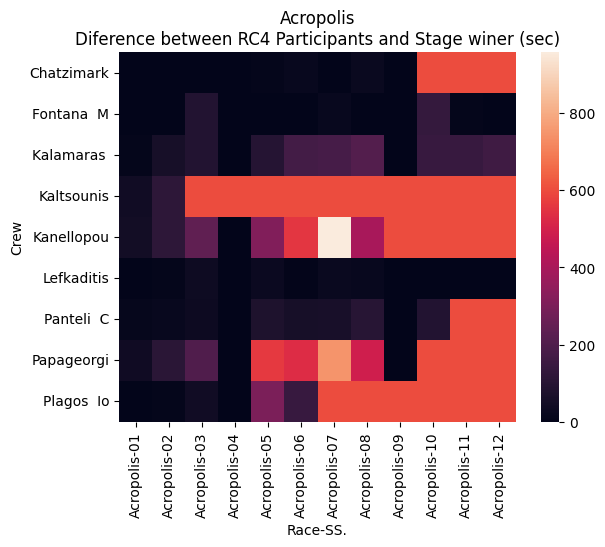

In [33]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

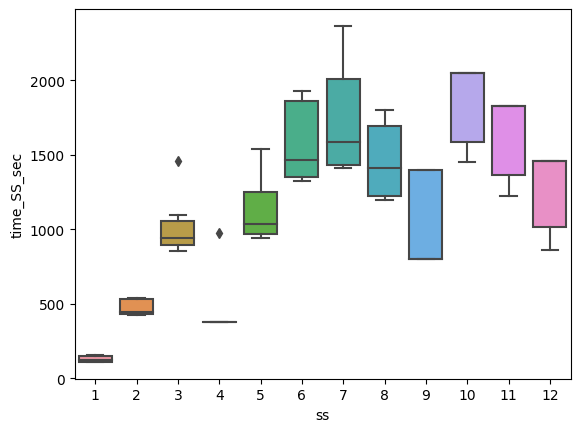

In [34]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + Group + ".png")

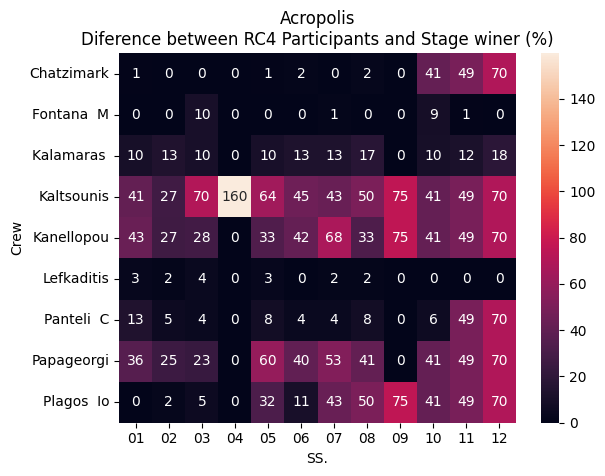

In [35]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
plt.savefig( Group + ".jpg")